In [196]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain_tumor_dataset/no/34 no.jpg
/kaggle/input/brain_tumor_dataset/no/N20.JPG
/kaggle/input/brain_tumor_dataset/no/N1.JPG
/kaggle/input/brain_tumor_dataset/no/49 no.jpg
/kaggle/input/brain_tumor_dataset/no/N15.jpg
/kaggle/input/brain_tumor_dataset/no/No18.jpg
/kaggle/input/brain_tumor_dataset/no/31 no.jpg
/kaggle/input/brain_tumor_dataset/no/no 6.jpg
/kaggle/input/brain_tumor_dataset/no/3 no.jpg
/kaggle/input/brain_tumor_dataset/no/no 5.jpeg
/kaggle/input/brain_tumor_dataset/no/no 1.jpg
/kaggle/input/brain_tumor_dataset/no/26 no.jpg
/kaggle/input/brain_tumor_dataset/no/N26.JPG
/kaggle/input/brain_tumor_dataset/no/N5.jpg
/kaggle/input/brain_tumor_dataset/no/6 no.jpg
/kaggle/input/brain_tumor_dataset/no/No21.jpg
/kaggle/input/brain_tumor_dataset/no/17 no.jpg
/kaggle/input/brain_tumor_dataset/no/No22.jpg
/kaggle/input/brain_tumor_dataset/no/29 no.jpg
/kaggle/input/brain_tumor_dataset/no/46 no.jpg
/kaggle/input/brain_tumor_dataset/no/32 no.jpg
/kaggle/input/brain_tumor_datase

In [197]:
import tensorflow as tf
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dropout, Dense, 
                          Flatten, GlobalAveragePooling2D, BatchNormalization, Activation)
from keras.applications import vgg16

In [1]:
DATASET_PATH = '/kaggle/input/brain_tumor_dataset/'
CATEGORIES = ['yes', 'no']
IMG_SIZE = 224

x = []
y = []

for label, category in enumerate(CATEGORIES):
    folder_path = os.path.join(DATASET_PATH, category)
    image_paths = glob.glob(os.path.join(folder_path, '*'))

    for img_path in tqdm(image_paths, desc=f'Loading {category}'):
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            x.append(img)
            y.append(label)
        except:
            continue

x = np.array(x)
y = np.array(y)

NameError: name 'os' is not defined

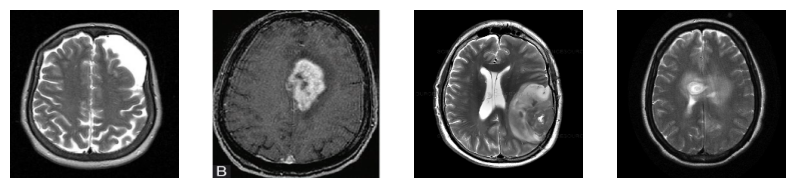

In [199]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()

In [200]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print("x_train shape:", x_train[0].shape)
print("x_test shape:", x_test[0].shape)

x_train shape: (224, 224, 3)
x_test shape: (224, 224, 3)


In [201]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

x_train = np.array(x_train)
x_test = np.array(x_test)

In [202]:
print("x_train Shape: ", x_train.shape)
print("x_test Shape: ", x_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

x_train Shape:  (169, 224, 224, 3)
x_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [203]:
img_rows, img_cols = IMG_SIZE, IMG_SIZE

vgg = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

# Freeze all layers
for layer in vgg.layers:
    layer.trainable = False

# Display layer information
for i, layer in enumerate(vgg.layers):
    print(f"{i}. {layer.__class__.__name__} - Trainable: {layer.trainable}")

0. InputLayer - Trainable: False
1. Conv2D - Trainable: False
2. Conv2D - Trainable: False
3. MaxPooling2D - Trainable: False
4. Conv2D - Trainable: False
5. Conv2D - Trainable: False
6. MaxPooling2D - Trainable: False
7. Conv2D - Trainable: False
8. Conv2D - Trainable: False
9. Conv2D - Trainable: False
10. MaxPooling2D - Trainable: False
11. Conv2D - Trainable: False
12. Conv2D - Trainable: False
13. Conv2D - Trainable: False
14. MaxPooling2D - Trainable: False
15. Conv2D - Trainable: False
16. Conv2D - Trainable: False
17. Conv2D - Trainable: False
18. MaxPooling2D - Trainable: False


In [204]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

In [205]:
num_classes = 2
FC_Head = lw(vgg, num_classes)
model = Model(inputs=vgg.input, outputs=FC_Head)

print(model.summary())

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_11          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 1024)                │         525,3

 Total params: 16,815,426 (64.15 MB)

 Trainable params: 2,100,738 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step


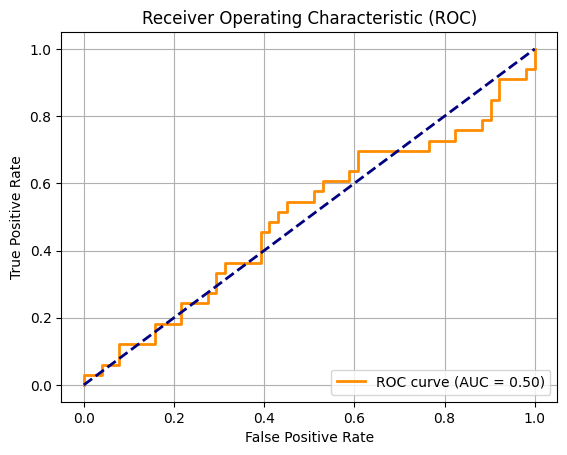

In [206]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions (probabilities)
y_prob = model.predict(x_test)

# Convert one-hot encoded y_test to single class labels, if needed
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# For binary classification, get probability for class 1
if y_prob.ndim > 1 and y_prob.shape[1] > 1:
    y_score = y_prob[:, 1]
else:
    y_score = y_prob.ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_labels, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [207]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',  # or 'categorical_crossentropy' for multi-class
    metrics=['accuracy']
)

In [208]:
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=6,
    validation_data=(x_test, y_test)
)


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.6542 - loss: 2.0397 - val_accuracy: 0.9048 - val_loss: 0.3743
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8629 - loss: 0.3153 - val_accuracy: 0.7976 - val_loss: 0.5651
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9398 - loss: 0.1248 - val_accuracy: 0.7619 - val_loss: 0.6343
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8643 - loss: 0.4029 - val_accuracy: 0.9167 - val_loss: 0.3283
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9625 - loss: 0.1015 - val_accuracy: 0.7857 - val_loss: 1.0143
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9543 - loss: 0.1234 - val_accuracy: 0.8333 - val_loss: 0.4460
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 1.0000 - loss: 0.0207 - val_accuracy: 0.8571 - val_loss: 0.9087
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9503 - loss: 0.2158 - val_accuracy: 0.

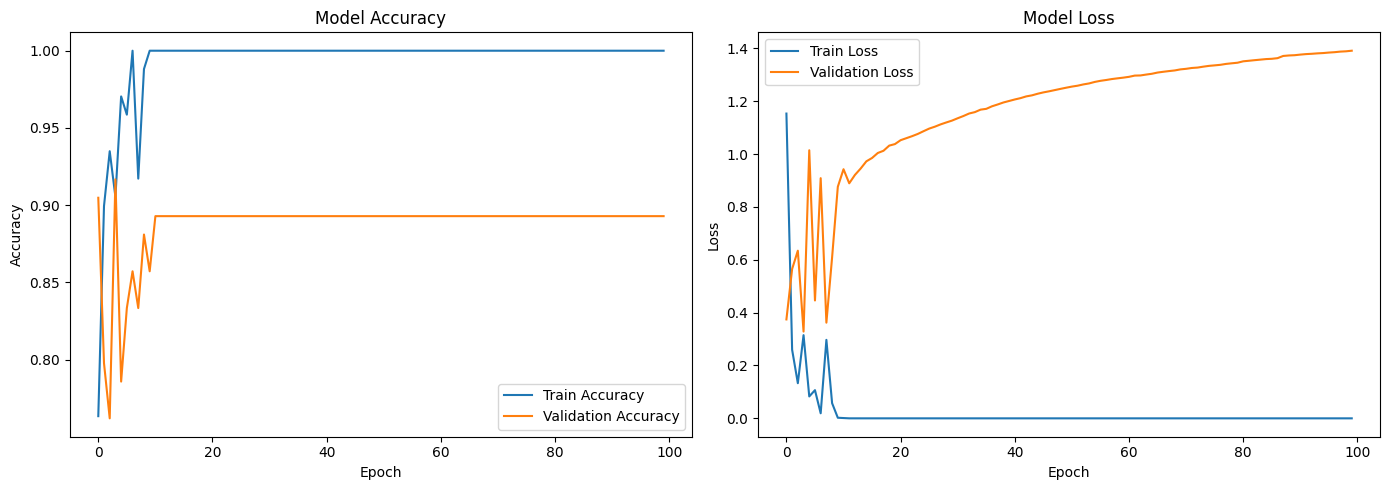

In [209]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [210]:
# Get predicted probabilities from the model
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels (assuming binary classification)
if y_pred_prob.shape[1] > 1:
    y_pred = np.argmax(y_pred_prob, axis=1)
else:
    y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Get true class labels
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Now you can compute metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step
Precision: 0.8529
Recall:    0.8788
F1 Score:  0.8657


In [211]:
from sklearn.metrics import confusion_matrix

dice_scores = []
TP_total = 0
TN_total = 0
FP_total = 0
FN_total = 0

for y_true, y_pred in zip(y_true_batch, y_pred_batch):
    y_pred_bin = (y_pred > 0.5).astype(np.uint8)
    dice = dice_coefficient(y_true, y_pred_bin)
    dice_scores.append(dice)
    
    # Flatten arrays for confusion matrix
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred_bin.flatten()
    
    tn, fp, fn, tp = confusion_matrix(y_true_flat, y_pred_flat, labels=[0,1]).ravel()
    
    TP_total += tp
    TN_total += tn
    FP_total += fp
    FN_total += fn

mean_dice = np.mean(dice_scores)

print(f"Mean Dice Coefficient: {mean_dice:.4f}")
print(f"Confusion Matrix totals:")
print(f"TP: {TP_total}")
print(f"TN: {TN_total}")
print(f"FP: {FP_total}")
print(f"FN: {FN_total}")


Mean Dice Coefficient: 0.4993
Confusion Matrix totals:
TP: 81698
TN: 82158
FP: 81588
FN: 82236


##### acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

In [214]:
model.save("brain_stroke_classifier.h5")
print("saved...")

saved...


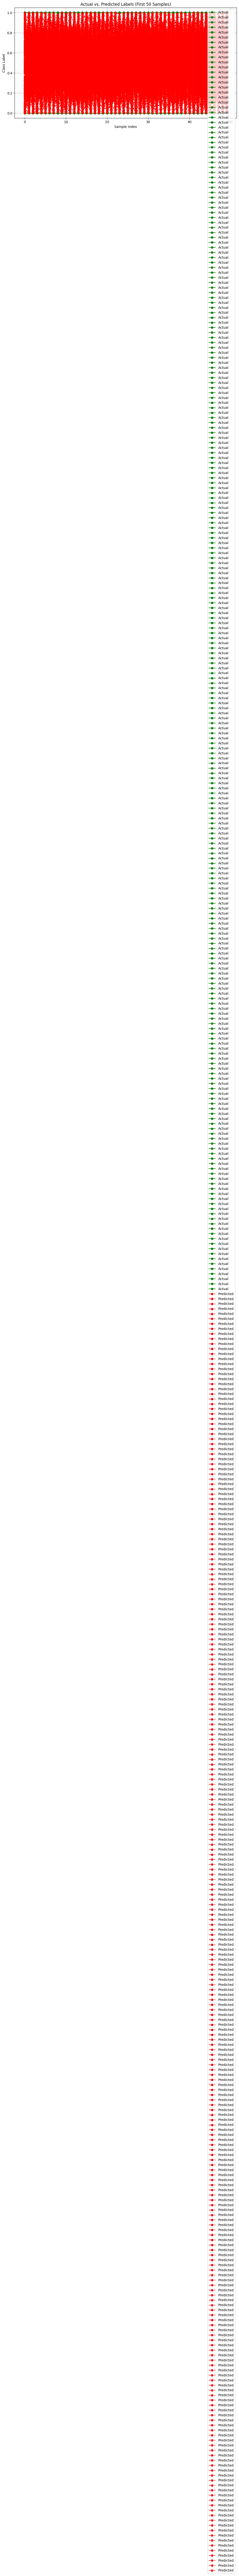

In [213]:

import matplotlib.pyplot as plt

# Plot actual vs predicted values for the first 50 samples
plt.figure(figsize=(12, 6))
plt.plot(y_true[:50], 'go-', label='Actual')
plt.plot(y_pred[:50], 'ro--', label='Predicted')
plt.title('Actual vs. Predicted Labels (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.grid(True)
plt.show()
